# Amazon Alexa Challenge

The goal of this challenge is to clean, explore, and visualize this data to create a sentiment analysis model to predict the rating based on the review text. Let's get started.

In [0]:
# Standard imports. You can import any other packages needed. You can install
# additional packages by using:
# !pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Fetch dataset
AlexaReviews = pd.read_csv('https://s3-us-west-2.amazonaws.com/patchworks-coding-challenge/amazon_alexa.tsv', sep='\t')

#Viewing the datatypes within each dataset, the shape and the first 10 rows
AlexaReviews.shape
print (' ')
print('Alexa Reviews Dataset')
print(AlexaReviews.dtypes)
print(' ')

print(AlexaReviews.shape)
print(' ')
AlexaReviews.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
 
Alexa Reviews Dataset
rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object
 
(3150, 5)
 


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


## Cleaning

It's been discovered that all verified_reviews that are only say "love it" or are only one word are actually fake. Reviews like "great!" or "Love It!" need to be removed from the dataset.

In the cell below, remove one word and "love it" reviews from the dataset.

In [0]:
#To remove "love it" and 1-word reviews
#I first had to find 1-word and 2-word sentences and store the resulting list in a Pandas series
counter = AlexaReviews['verified_reviews'].str.count(' ')

#then I attached it to the AlexaReviews dataframe like so:
AlexaReviews['space_counter'] = counter

#filtered out rows that had 1-word and 2-word i.e. space counter of 1 or 0:
authentic = AlexaReviews['space_counter'] > 1
AlexaReviews = AlexaReviews[authentic]

#Finally, we can drop the space_counter column because we don't need it anymore
AlexaReviews = AlexaReviews.drop(['space_counter'], axis = 1)

#change the format of the date column to date-time
AlexaReviews['date'] = pd.to_datetime(AlexaReviews['date'])

#and leave the reviews in lowercase
AlexaReviews['verified_reviews'] = AlexaReviews['verified_reviews'].str.lower()

print(AlexaReviews.shape)
print(' ')
AlexaReviews.head(10)

(2794, 5)
 


,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love my echo!,1
2,4,2018-07-31,Walnut Finish,"sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1
5,5,2018-07-31,Heather Gray Fabric,i received the echo as a gift. i needed anothe...,1
6,3,2018-07-31,Sandstone Fabric,"without having a cellphone, i cannot use many ...",1
7,5,2018-07-31,Charcoal Fabric,i think this is the 5th one i've purchased. i'...,1
9,5,2018-07-30,Heather Gray Fabric,love it! i’ve listened to songs i haven’t hear...,1
10,5,2018-07-30,Charcoal Fabric,"i sent it to my 85 year old dad, and he talks ...",1
11,5,2018-07-30,Charcoal Fabric,i love it! learning knew things with it eveyda...,1
12,5,2018-07-30,Oak Finish,i purchased this for my mother who is having k...,1


## Visualization

In the cells below:
1.   Create a bar graph showing the number of reviews per day from the date of the first review to the date of the last review
2.   Create a histogram of ratings

All graphs must have labels for X and Y axes.



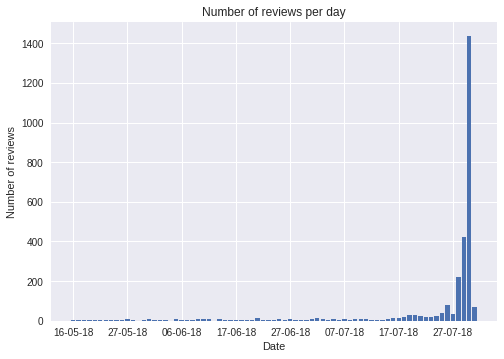

,date,group_count,date_string
0,2018-05-16,3,16-05-18
1,2018-05-17,6,17-05-18
2,2018-05-18,3,18-05-18


In [0]:
# Create a bar graph showing the number of reviews per day from the date of the first review to the date of the last review
#So what we do is first group the data by the date column
grouped_df = AlexaReviews.groupby(['date'])
#then create a new dataframe of these grouped values
GroupCount = pd.DataFrame(grouped_df.size().reset_index(name = 'group_count'))

#Now we can start to create our graph!
#First we convert the date-time values to strings; I created a new series to easily track my changes
GroupCount['date_string'] = GroupCount['date'].dt.strftime('%d-%m-%y')
#then we can use the code below to create a graph of our values:
plt.bar(GroupCount['date_string'], GroupCount['group_count'])
plt.xlabel('Date')
plt.xticks(np.arange(0, 80, step = 10))
plt.ylabel('Number of reviews')
plt.title('Number of reviews per day')

#There you have it! All that's left now is to display our graph
#and the head of our table, so as to verify that the date values match
plt.show()
print(' ')
GroupCount.head(3)

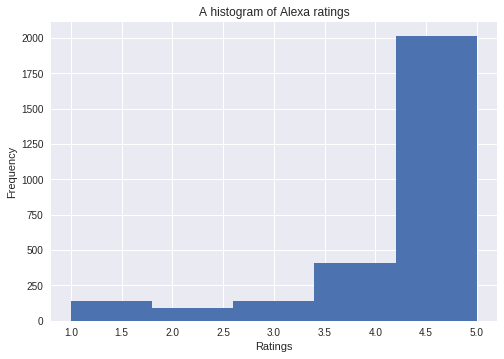

In [0]:
# Create a histogram of ratings
plt.hist(AlexaReviews['rating'], bins = 5)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('A histogram of Alexa ratings')
plt.show()

## Exploration and Feature Engineering

Let's create some features for our model. Reminder: you are welcome to install and use any packages you wish.


1.   Create a new column called "verified_reviews_clean" that removes filler words from "verified_reviews" like "the", "a", "and", "I", etc. 
2.   Find the most common non-filler words for each rating score. Example:


```
Rating |ReviewsWith_love | ReviewsWith_laugh | ....
1               0                  1              
2               0                  2             
3               2                  1            
...

```

3.   Create dummy variables (1 or 0) for the presence of these words in each review.



In [0]:
# Create a new column called "verified_reviews_clean" that removes filler words
# from "verified_reviews" like "the", "a", "and", "I", etc.

#First we define what out filler words are, borrowing from the nltk list of English stopwords
FillerWords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'ma']
print(nltk.corpus.stopwords.words('english'))
print(' ')

#Next we create the new column:
stop = set(FillerWords)
AlexaReviews['verified_reviews_clean'] = AlexaReviews['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print(AlexaReviews.shape)
print(' ')
AlexaReviews.head(10)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,rating,date,variation,verified_reviews,feedback,verified_reviews_clean
0,5,2018-07-31,Charcoal Fabric,love my echo!,1,love echo!
2,4,2018-07-31,Walnut Finish,"sometimes while playing a game, you can answer...",1,"sometimes playing game, answer question correc..."
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1,"lot fun thing. 4 yr old learns dinosaurs, cont..."
5,5,2018-07-31,Heather Gray Fabric,i received the echo as a gift. i needed anothe...,1,received echo gift. needed another bluetooth s...
6,3,2018-07-31,Sandstone Fabric,"without having a cellphone, i cannot use many ...",1,"without cellphone, cannot use many features. i..."
7,5,2018-07-31,Charcoal Fabric,i think this is the 5th one i've purchased. i'...,1,think 5th one i've purchased. i'm working gett...
9,5,2018-07-30,Heather Gray Fabric,love it! i’ve listened to songs i haven’t hear...,1,love it! i’ve listened songs haven’t heard sin...
10,5,2018-07-30,Charcoal Fabric,"i sent it to my 85 year old dad, and he talks ...",1,"sent 85 year old dad, talks constantly."
11,5,2018-07-30,Charcoal Fabric,i love it! learning knew things with it eveyda...,1,love it! learning knew things eveyday! still f...
12,5,2018-07-30,Oak Finish,i purchased this for my mother who is having k...,1,"purchased mother knee problems now, give somet..."


In [0]:
# Find the most common non-filler words for each rating score. Example:
# Rating |ReviewsWith_love | ReviewsWith_laugh | ....
# 1               0                  1              
# 2               0                  2             
# 3               2                  1            
# ...

# In this portion of the challenge we are trying to answer the following question: How can we get the most frequent word in each row?
#Firstly, we clone the cleaned AlexaReviews dataframe and drop all columns except the 'verified_reviews_clean' and 'rating' columns
Table = AlexaReviews
Table = Table.drop(labels = 'date', axis = 1)
Table = Table.drop(labels = 'variation', axis = 1)
Table = Table.drop(labels = 'verified_reviews', axis = 1)
Table = Table.drop(labels = 'feedback', axis = 1)


#Next, we try to find the count of words that indicate positive sentiment by creating new columns
Table['ReviewsWithLove'] = Table['verified_reviews_clean'].str.count('love')
Table['ReviewsWithLike'] = Table['verified_reviews_clean'].str.count('like')
Table['ReviewsWithAwesome'] = Table['verified_reviews_clean'].str.count('awesome')
Table['ReviewsWithGreat'] = Table['verified_reviews_clean'].str.count('great')
Table['ReviewsWithGood'] = Table['verified_reviews_clean'].str.count('good')
Table['ReviewsWithOkay'] = Table['verified_reviews_clean'].str.count('okay')
Table['ReviewsWithFine'] = Table['verified_reviews_clean'].str.count(' fine ')
Table['ReviewsWithLovely'] = Table['verified_reviews_clean'].str.count('lovely')
Table['ReviewsWithHandy'] = Table['verified_reviews_clean'].str.count('handy')
Table['ReviewsWithUseful'] = Table['verified_reviews_clean'].str.count('useful')
Table['ReviewsWithLaugh'] = Table['verified_reviews_clean'].str.count('laugh')
Table['ReviewsWithBeautiful'] = Table['verified_reviews_clean'].str.count('beautiful')
Table['ReviewsWithHappy'] = Table['verified_reviews_clean'].str.count('happy')
Table['ReviewsWithWonderful'] = Table['verified_reviews_clean'].str.count('wonderful')
Table['ReviewsWithWorks'] = Table['verified_reviews_clean'].str.count('works')
Table['ReviewsWithFunction'] = Table['verified_reviews_clean'].str.count('function')
Table['ReviewsWithSatisfied'] = Table['verified_reviews_clean'].str.count('satisfied')
Table['ReviewsWithDefinitely'] = Table['verified_reviews_clean'].str.count('definitely')



#Upon determining words that indicate positive sentiment, let's do the same for words that indicate negative sentiment, creating new columns as follows:
Table["ReviewsWithDon'tLove"] = Table['verified_reviews_clean'].str.count("don't love")
Table["ReviewsWithDon'tLike"] = Table['verified_reviews_clean'].str.count("don't like")
Table["ReviewsWithDislike"] = Table['verified_reviews_clean'].str.count("dislike")
Table['ReviewsWithHate'] = Table['verified_reviews_clean'].str.count('hate')
Table['ReviewsWithNotGreat'] = Table['verified_reviews_clean'].str.count('not great')
Table['ReviewsWithNoGood'] = Table['verified_reviews_clean'].str.count('no good')
Table['ReviewsWithNotOkay'] = Table['verified_reviews_clean'].str.count('not okay')
Table['ReviewsWithNotFine'] = Table['verified_reviews_clean'].str.count('not fine ')
Table['ReviewsWithUseless'] = Table['verified_reviews_clean'].str.count('useless')
Table['ReviewsWithFrustrate'] = Table['verified_reviews_clean'].str.count('frustrat')
Table['ReviewsWithUgly'] = Table['verified_reviews_clean'].str.count('ugly')
Table['ReviewsWithUnhappy'] = Table['verified_reviews_clean'].str.count('unhappy')
Table['ReviewsWithSad'] = Table['verified_reviews_clean'].str.count('sad')
Table['ReviewsWithDetest'] = Table['verified_reviews_clean'].str.count('detest')
Table["ReviewsWithDoesn'tWork"] = Table['verified_reviews_clean'].str.count("doesn't work")
Table['ReviewsWithNotWorking'] = Table['verified_reviews_clean'].str.count('not working')
Table["ReviewsWithDoesn'tFunction"] = Table['verified_reviews_clean'].str.count("doesn't function")
Table["ReviewsWithFaulty"] = Table['verified_reviews_clean'].str.count("faulty")
Table['ReviewsWithBad'] = Table['verified_reviews_clean'].str.count('Bad')
Table['ReviewsWithHorrible'] = Table['verified_reviews_clean'].str.count('horrible')
Table['ReviewsWithCry'] = Table['verified_reviews_clean'].str.count('cry')
Table['ReviewsWithTerrible'] = Table['verified_reviews_clean'].str.count('terrible')
Table['ReviewsWithDisgust'] = Table['verified_reviews_clean'].str.count('disgust')
Table['ReviewsWithUgh'] = Table['verified_reviews_clean'].str.count(' ugh')
Table['ReviewsWithDissatisfied'] = Table['verified_reviews_clean'].str.count('dissatisfied')
Table['ReviewsWithDysfunctional'] = Table['verified_reviews_clean'].str.count('dysfunctional')
Table['ReviewsWithBroken'] = Table['verified_reviews_clean'].str.count('broken')
Table['ReviewsWithSpoil'] = Table['verified_reviews_clean'].str.count('spoil')
Table['ReviewsWithDamage'] = Table['verified_reviews_clean'].str.count('damag')


#We can then print our findings as follows:
print('------------WORDS THAT INDICATE POSITIVE SENTIMENT------------')

print('Total number of times that the word "Love" occurs = ' + str(Table["ReviewsWithLove"].sum()))
print('Total number of times that the word "Great" occurs = ' + str(Table['ReviewsWithGreat'].sum()))
print('Total number of times that the word "Like" occurs = ' + str(Table['ReviewsWithLike'].sum()))
print('Total number of times that the word "Works" occurs = ' + str(Table['ReviewsWithWorks'].sum()))
print('Total number of times that the word "Good" occurs = ' + str(Table['ReviewsWithGood'].sum()))

print('Total number of times that the word "Awesome" occurs = ' + str(Table['ReviewsWithAwesome'].sum()))
print('Total number of times that the word "Happy" occurs = ' + str(Table['ReviewsWithHappy'].sum()))
print('Total number of times that the word "Definitely" occurs = ' + str(Table['ReviewsWithDefinitely'].sum()))
print('Total number of times that the word "Function" occurs = ' + str(Table['ReviewsWithFunction'].sum()))
print('Total number of times that the word "Wonderful" occurs = ' + str(Table['ReviewsWithWonderful'].sum()))
print('Total number of times that the word "Useful" occurs = ' + str(Table['ReviewsWithUseful'].sum()))
print('Total number of times that the word "Handy" occurs = ' + str(Table['ReviewsWithHandy'].sum()))
print('Total number of times that the word "Satisfied" occurs = ' + str(Table['ReviewsWithSatisfied'].sum()))
print('Total number of times that the word "Fine" occurs = ' + str(Table['ReviewsWithFine'].sum()))
print('Total number of times that the word "Laugh" occurs = ' + str(Table['ReviewsWithLaugh'].sum()))

print('Total number of times that the word "Beautiful" occurs = ' + str(Table['ReviewsWithBeautiful'].sum()))
print('Total number of times that the word "Okay" occurs = ' + str(Table['ReviewsWithOkay'].sum()))

print('Total number of times that the word "Lovely" occurs = ' + str(Table['ReviewsWithLovely'].sum()))


print(' ')
print(' ')


print('------------WORDS THAT INDICATE NEGATIVE SENTIMENT------------')

print('Total number of times that the word "'"Frustrat(ed)"'" occurs = ' + str(Table['ReviewsWithFrustrate'].sum()))
print('Total number of times that the word "Terrible" occurs = ' + str(Table['ReviewsWithTerrible'].sum()))
print('Total number of times that the word "Dislike" occurs = ' + str(Table['ReviewsWithDislike'].sum()))
print('Total number of times that the word "Hate" occurs = ' + str(Table['ReviewsWithHate'].sum()))
print('Total number of times that the word "Useless" occurs = ' + str(Table['ReviewsWithUseless'].sum()))
print('Total number of times that the word "'"Doesn't Work"'" occurs = ' + str(Table["ReviewsWithDoesn'tWork"].sum()))

print('Total number of times that the word "Horrible" occurs = ' + str(Table['ReviewsWithHorrible'].sum()))
print('Total number of times that the word "'"Spoil(ed)"'" occurs = ' + str(Table['ReviewsWithSpoil'].sum()))
print('Total number of times that the word "'"Damag(ed)"'" occurs = ' + str(Table['ReviewsWithDamage'].sum()))
print('Total number of times that the word "Broken" occurs = ' + str(Table['ReviewsWithBroken'].sum()))
print('Total number of times that the word "Faulty" occurs = ' + str(Table['ReviewsWithFaulty'].sum()))
print('Total number of times that the word "Unhappy" occurs = ' + str(Table['ReviewsWithUnhappy'].sum()))
print('Total number of times that the word "Ugly" occurs = ' + str(Table['ReviewsWithUgly'].sum()))

print('Total number of times that the word "Ugh!" occurs = ' + str(Table['ReviewsWithUgh'].sum()))
print('Total number of times that the word "'"Don't Love"'" occurs = ' + str(Table["ReviewsWithDon'tLove"].sum()))
print('Total number of times that the word "Disgust" occurs = ' + str(Table['ReviewsWithDisgust'].sum()))
print('Total number of times that the word "Detest" occurs = ' + str(Table['ReviewsWithDetest'].sum()))
print('Total number of times that the word "Not Great" occurs = ' + str(Table['ReviewsWithNotGreat'].sum()))
print('Total number of times that the word "'"Don't Like"'" occurs = ' + str(Table["ReviewsWithDon'tLike"].sum()))
print('Total number of times that the word "Not Working" occurs = ' + str(Table['ReviewsWithNotWorking'].sum()))
print('Total number of times that the word "No Good" occurs = ' + str(Table['ReviewsWithNoGood'].sum()))
print('Total number of times that the word "Not Fine" occurs = ' + str(Table['ReviewsWithNotFine'].sum()))
print('Total number of times that the word "Bad" occurs = ' + str(Table['ReviewsWithBad'].sum()))
print('Total number of times that the word "Not Okay" occurs = ' + str(Table['ReviewsWithNotOkay'].sum()))
print('Total number of times that the word "Dissatisfied" occurs = ' + str(Table['ReviewsWithDissatisfied'].sum()))
print('Total number of times that the word "dysfunctional" occurs = ' + str(Table['ReviewsWithDysfunctional'].sum()))
print('Total number of times that the word "'"Doesn't Function"'" occurs = ' + str(Table["ReviewsWithDoesn'tFunction"].sum()))
print('Total number of times that the word "Cry" occurs = ' + str(Table['ReviewsWithCry'].sum()))

------------WORDS THAT INDICATE POSITIVE SENTIMENT------------
Total number of times that the word "Love" occurs = 982
Total number of times that the word "Great" occurs = 678
Total number of times that the word "Like" occurs = 544
Total number of times that the word "Works" occurs = 349
Total number of times that the word "Good" occurs = 265
Total number of times that the word "Awesome" occurs = 68
Total number of times that the word "Happy" occurs = 61
Total number of times that the word "Definitely" occurs = 47
Total number of times that the word "Function" occurs = 45
Total number of times that the word "Wonderful" occurs = 37
Total number of times that the word "Useful" occurs = 32
Total number of times that the word "Handy" occurs = 19
Total number of times that the word "Satisfied" occurs = 18
Total number of times that the word "Fine" occurs = 17
Total number of times that the word "Laugh" occurs = 11
Total number of times that the word "Beautiful" occurs = 7
Total number of ti

In [0]:
#Finally, we can use this data to form grouped tables which we can then convert into dataframes as follows: 
GroupedTable1 = Table.groupby(['rating'])['ReviewsWithLove'].sum()
GroupedTable1 = pd.DataFrame(GroupedTable1)
GroupedTable2 = Table.groupby(['rating'])['ReviewsWithGreat'].sum()
GroupedTable2 = pd.DataFrame(GroupedTable2)
GroupedTable3 = Table.groupby(['rating'])['ReviewsWithLike'].sum()
GroupedTable3 = pd.DataFrame(GroupedTable3)
GroupedTable4 = Table.groupby(['rating'])['ReviewsWithWorks'].sum()
GroupedTable4 = pd.DataFrame(GroupedTable4)
GroupedTable5 = Table.groupby(['rating'])['ReviewsWithGood'].sum()
GroupedTable5 = pd.DataFrame(GroupedTable5)
GroupedTable6 = Table.groupby(['rating'])['ReviewsWithAwesome'].sum()
GroupedTable6 = pd.DataFrame(GroupedTable6)
GroupedTable7 = Table.groupby(['rating'])['ReviewsWithHappy'].sum()
GroupedTable7 = pd.DataFrame(GroupedTable7)
GroupedTable8 = Table.groupby(['rating'])['ReviewsWithDefinitely'].sum()
GroupedTable8 = pd.DataFrame(GroupedTable8)
GroupedTable9 = Table.groupby(['rating'])['ReviewsWithFunction'].sum()
GroupedTable9 = pd.DataFrame(GroupedTable9)
GroupedTable10 = Table.groupby(['rating'])['ReviewsWithWonderful'].sum()
GroupedTable10 = pd.DataFrame(GroupedTable10)
GroupedTable11 = Table.groupby(['rating'])['ReviewsWithUseful'].sum()
GroupedTable11 = pd.DataFrame(GroupedTable11)
GroupedTable12 = Table.groupby(['rating'])['ReviewsWithHandy'].sum()
GroupedTable12 = pd.DataFrame(GroupedTable12)
GroupedTable13 = Table.groupby(['rating'])['ReviewsWithSatisfied'].sum()
GroupedTable13 = pd.DataFrame(GroupedTable13)
GroupedTable14 = Table.groupby(['rating'])['ReviewsWithFine'].sum()
GroupedTable14 = pd.DataFrame(GroupedTable14)
GroupedTable15 = Table.groupby(['rating'])['ReviewsWithLaugh'].sum()
GroupedTable15 = pd.DataFrame(GroupedTable15)
GroupedTable16 = Table.groupby(['rating'])['ReviewsWithBeautiful'].sum()
GroupedTable16 = pd.DataFrame(GroupedTable16)
GroupedTable17 = Table.groupby(['rating'])['ReviewsWithOkay'].sum()
GroupedTable17 = pd.DataFrame(GroupedTable17)

GroupedTable18 = Table.groupby(['rating'])['ReviewsWithFrustrate'].sum()
GroupedTable18 = pd.DataFrame(GroupedTable18)
GroupedTable19 = Table.groupby(['rating'])['ReviewsWithTerrible'].sum()
GroupedTable19 = pd.DataFrame(GroupedTable19)
GroupedTable20 = Table.groupby(['rating'])['ReviewsWithDislike'].sum()
GroupedTable20 = pd.DataFrame(GroupedTable20)
GroupedTable21 = Table.groupby(['rating'])['ReviewsWithHate'].sum()
GroupedTable21 = pd.DataFrame(GroupedTable21)
GroupedTable22 = Table.groupby(['rating'])['ReviewsWithUseless'].sum()
GroupedTable22 = pd.DataFrame(GroupedTable22)
GroupedTable23 = Table.groupby(['rating'])["ReviewsWithDoesn'tWork"].sum()
GroupedTable23 = pd.DataFrame(GroupedTable23)
GroupedTable24 = Table.groupby(['rating'])['ReviewsWithHorrible'].sum()
GroupedTable24 = pd.DataFrame(GroupedTable24)
GroupedTable25 = Table.groupby(['rating'])['ReviewsWithSpoil'].sum()
GroupedTable25 = pd.DataFrame(GroupedTable25)
GroupedTable26 = Table.groupby(['rating'])['ReviewsWithDamage'].sum()
GroupedTable26 = pd.DataFrame(GroupedTable26)
GroupedTable27 = Table.groupby(['rating'])['ReviewsWithBroken'].sum()
GroupedTable27 = pd.DataFrame(GroupedTable27)
GroupedTable28 = Table.groupby(['rating'])['ReviewsWithFaulty'].sum()
GroupedTable28 = pd.DataFrame(GroupedTable28)
GroupedTable29 = Table.groupby(['rating'])['ReviewsWithUnhappy'].sum()
GroupedTable29 = pd.DataFrame(GroupedTable29)
GroupedTable30 = Table.groupby(['rating'])['ReviewsWithUgly'].sum()
GroupedTable30 = pd.DataFrame(GroupedTable30)



FrequencyTable = GroupedTable1  
FrequencyTable['RW_Love'] = GroupedTable1['ReviewsWithLove']
FrequencyTable = FrequencyTable.drop(labels = 'ReviewsWithLove', axis = 1)
FrequencyTable['RW_Great'] = GroupedTable2['ReviewsWithGreat']
FrequencyTable['RW_Like'] = GroupedTable3['ReviewsWithLike']
FrequencyTable['RW_Works'] = GroupedTable4['ReviewsWithWorks']
FrequencyTable['RW_Good'] = GroupedTable5['ReviewsWithGood']
FrequencyTable['RW_Awesome'] = GroupedTable6['ReviewsWithAwesome']
FrequencyTable['RW_Happy'] = GroupedTable7['ReviewsWithHappy']
FrequencyTable['RW_Definitely'] = GroupedTable8['ReviewsWithDefinitely']
FrequencyTable['RW_Function'] = GroupedTable9['ReviewsWithFunction']
FrequencyTable['RW_Wonderful'] = GroupedTable10['ReviewsWithWonderful']
FrequencyTable['RW_Useful'] = GroupedTable11['ReviewsWithUseful']
FrequencyTable['RW_Handy'] = GroupedTable12['ReviewsWithHandy']
FrequencyTable['RW_Satisfied'] = GroupedTable13['ReviewsWithSatisfied']
FrequencyTable['RW_Fine'] = GroupedTable14['ReviewsWithFine']
FrequencyTable['RW_Laugh'] = GroupedTable15['ReviewsWithLaugh']
FrequencyTable['RW_Beautiful'] = GroupedTable16['ReviewsWithBeautiful']
FrequencyTable['RW_Okay'] = GroupedTable17['ReviewsWithOkay']

FrequencyTable['RW_Frustrate'] = GroupedTable18['ReviewsWithFrustrate']
FrequencyTable['RW_Terrible'] = GroupedTable19['ReviewsWithTerrible']
FrequencyTable['RW_Dislike'] = GroupedTable20['ReviewsWithDislike']
FrequencyTable['RW_Hate'] = GroupedTable21['ReviewsWithHate']
FrequencyTable['RW_Useless'] = GroupedTable22['ReviewsWithUseless']
FrequencyTable["RW_Doesn'tWork"] = GroupedTable23["ReviewsWithDoesn'tWork"]
FrequencyTable['RW_Horrible'] = GroupedTable24['ReviewsWithHorrible']
FrequencyTable['RW_Spoil'] = GroupedTable25['ReviewsWithSpoil']
FrequencyTable['RW_Damage'] = GroupedTable26['ReviewsWithDamage']
FrequencyTable['RW_Broken'] = GroupedTable27['ReviewsWithBroken']
FrequencyTable['RW_Faulty'] = GroupedTable28['ReviewsWithFaulty']
FrequencyTable['RW_Unhappy'] = GroupedTable29['ReviewsWithUnhappy']
FrequencyTable['RW_Ugly'] = GroupedTable30['ReviewsWithUgly']



#and display it.
FrequencyTable.head(5)

,RW_Love,RW_Great,RW_Like,RW_Works,RW_Good,RW_Awesome,RW_Happy,RW_Definitely,RW_Function,RW_Wonderful,...,RW_Hate,RW_Useless,RW_Doesn'tWork,RW_Horrible,RW_Spoil,RW_Damage,RW_Broken,RW_Faulty,RW_Unhappy,RW_Ugly
rating,,,,,,,,,,,,,,,,,,,,,
1,7,12,17,18,7,2,3,0,4,0,...,3,7,0,5,0,0,2,0,0,0
2,1,7,27,5,8,1,4,5,4,0,...,0,0,4,0,0,1,0,0,1,0
3,9,14,41,16,21,2,1,0,3,0,...,1,2,3,0,1,0,0,0,0,0
4,98,130,130,57,67,5,8,17,13,2,...,2,2,3,0,0,0,0,1,0,0
5,867,515,329,253,162,58,45,25,21,35,...,7,1,2,0,2,2,0,0,0,1


In [0]:
# Create dummy variables (1 or 0) for the presence of these words in each review.

#Based on the above table the features to be dummified are:
#-----POSITIVE-----
#Love
#Great
#Like
#Works
#Good
#Awesome
#-----NEGATIVE-----
#Terrible
#Useless
#Doesn't Work
#Horrible
#Broken
#Unhappy

AlexaReviews['love_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('love', regex=True).astype(int)
AlexaReviews['great_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('great', regex=True).astype(int)
AlexaReviews['like_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('like', regex=True).astype(int)
AlexaReviews['works_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('works', regex=True).astype(int)
AlexaReviews['good_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('good', regex=True).astype(int)
AlexaReviews['awesome_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('awesome', regex=True).astype(int)

AlexaReviews['terrible_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('terrible', regex=True).astype(int)
AlexaReviews['useless_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('useless', regex=True).astype(int)
AlexaReviews['DoesntWork_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains("doesn't work", regex=True).astype(int)
AlexaReviews['horrible_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('horrible', regex=True).astype(int)
AlexaReviews['broken_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('broken', regex=True).astype(int)
AlexaReviews['unhappy_dummy'] = AlexaReviews['verified_reviews_clean'].str.contains('unhappy', regex=True).astype(int)

#now that we have our dummy variables, let's drop the columns that we don't need:
AlexaReviews = AlexaReviews.drop(labels = 'verified_reviews', axis = 1)
AlexaReviews = AlexaReviews.drop(labels = 'verified_reviews_clean', axis = 1)
AlexaReviews = AlexaReviews.drop(labels = 'variation', axis = 1)
AlexaReviews = AlexaReviews.drop(labels = 'date', axis = 1)


#and print out the shape of our dataframe
print(AlexaReviews.shape)
print(' ')
AlexaReviews.head(10)

(2794, 14)
 


,rating,feedback,love_dummy,great_dummy,like_dummy,works_dummy,good_dummy,awesome_dummy,terrible_dummy,useless_dummy,DoesntWork_dummy,horrible_dummy,broken_dummy,unhappy_dummy
0,5,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,1,0,0,0,0,0,0,0,0,0
3,5,1,0,0,1,0,0,0,0,0,0,0,0,0
5,5,1,0,0,0,0,0,0,0,0,0,0,0,0
6,3,1,0,1,0,0,0,0,0,0,0,0,0,0
7,5,1,0,0,1,0,0,0,0,0,0,0,0,0
9,5,1,1,1,0,0,0,0,0,0,0,0,0,0
10,5,1,0,0,0,0,0,0,0,0,0,0,0,0
11,5,1,1,0,0,1,0,0,0,0,0,0,0,0
12,5,1,0,0,1,0,0,0,0,0,0,0,0,0


## Prediction

Create a model using your new features to predict the rating score given the review.


1.   Split the dataset into a training and test set using the method of your choice.
2.   Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible. In the text cell, explain how you chose your model and loss function.



In [0]:
# Split the dataset into a training and test set using the method of your choice.
#At this point, we need to separate the label (rating) from the features
Label = AlexaReviews['rating']
Features = AlexaReviews
Features = Features.drop(labels = 'rating', axis = 1)

#and split the dataset using scikitlearn
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(1955, 13) (1955,)
(839, 13) (839,)


----------LINEAR REGRESSION----------
 
[5. 5. 1. 5. 5.]
Accuracy of our model:  0.7539445443337054
 
L1 loss function/ Mean Absolute Error of our model:  0.27532777115613827
Quadratic loss/ L2 loss function/ Mean Squared Error of our model:  0.3706793802145411
Root Mean Squared Error of our model:  0.6088344440112937
R2 of our model:  0.6775238462470123
Adjusted R2 of our model:  0.672442403824238
 


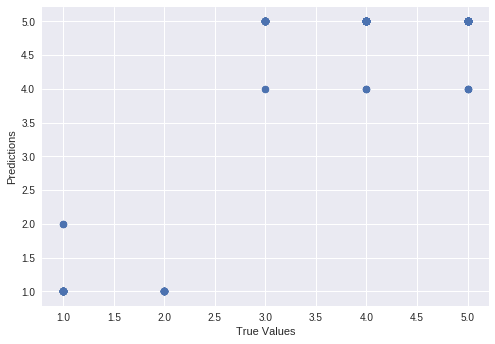

In [0]:
# Create a column called "predicted_rating" and use the model of your choice to achieve the best accuracy possible.
# SCENARIO 1: SIMPLE LINEAR REGRESSION WITHOUT CROSS-VALIDATION
lm = linear_model.LinearRegression()

lm_model = lm.fit(X_train, y_train)
predicted_rating = lm.predict(X_test)
predicted_rating = np.around(predicted_rating)

print('----------LINEAR REGRESSION----------')
print(' ')
print(predicted_rating[:5])
print('Accuracy of our model: ', lm_model.score(X_test, y_test))
print(' ')
print('L1 loss function/ Mean Absolute Error of our model: ', metrics.mean_absolute_error(y_test, predicted_rating))
print('Quadratic loss/ L2 loss function/ Mean Squared Error of our model: ', metrics.mean_squared_error(y_test, predicted_rating))
print('Root Mean Squared Error of our model: ', np.sqrt(metrics.mean_squared_error(y_test, predicted_rating)))
print('R2 of our model: ', metrics.r2_score(y_test, predicted_rating))
adjusted_r2_score = 1 - (1 - (metrics.r2_score(y_test, predicted_rating)))*((839-1)/(839-13-1))
print('Adjusted R2 of our model: ', adjusted_r2_score)
print(' ')

plt.scatter(y_test, predicted_rating)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#Good source material on choice of a loss function: https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
#and: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

##Explain how you chose your model and loss function

When we look at the graph above, we see that the outliers are extreme when rating 3 and 2 (2 and 3 were completely misclassified), but classified 1, 4 and 5 a lot better (confusing them only some of the time). Bearing in mind that there were very few 1, 2 and 3 star reviews to train the model and test the model, this behaviour makes sense - a model is only as good as the information that you give it. As a result of this output, L1 loss function is suitable beacause it can handle many outliers.

Linear regression was a model that I selected because I needed more than 1 output (I had to have 5 predicted ratings). Furthermore, this model would allow me to identify the features with the largest influence.

## Bonus Points
For bonus points, write a sentence or two about how you could further improve your model. This is not required.

*I would definitely try other models to see if I would get a better accuracy score and minimize resulting errors. I'm not complaining though - a model with an accuracy of 75% is a good start!*